In [1]:
import sys
sys.path += [".."]

import smbh
import numpy as np
from scipy.optimize import curve_fit

from glob import glob

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
def buildGrid(data, speeds):
    n = len(data[0])
    m = len(speeds)
    grid = np.zeros((n, m, 2))
    
    for i in range(m):
        grid[:, i] = data[i][:, 1:]
        
    grid[:, :, 0] *= 1000
    return grid

def getValidOnly(x, y):
    x = x.copy()
    y = y.copy()
    p = np.where(x > 0)[0]
    return x[p], y[p]

def plotRTvsSF(grid, s = 25, label_every = 10):
    global SPEEDS, FRACTIONS
    colors = [smbh.rgbToHex(color) for color in smbh.getColors(len(SPEEDS))]
    fig, ax = plt.subplots(figsize = (8, 4.5))

    for (i, v) in enumerate(SPEEDS):
        ts = grid[:, i, 0]
        ts, fs = getValidOnly(ts, FRACTIONS)
        c = colors[i]
        ax.plot(fs, ts, lw = 1, c = c)
        if i % label_every == 0:
            ax.plot(fs, ts, lw = 0.5, c = c)
            ax.scatter(fs, ts, s = s, alpha = 1, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)

    ax.set_xlabel("Stellar fraction")
    ax.set_ylabel("Return time (Myr)")
    ax.set_xlim(fs[0], fs[-1])
    ax.set_yscale("log")
    ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.1),
              ncol = 4, fancybox = True, shadow = True)
    ax.grid()

    fig.tight_layout()
    return fig, ax

In [3]:
files_s = sorted(glob("Resumes/s*_resume.dat"))[::-1]
files_t = sorted(glob("Resumes/t*_resume.dat"))[::-1]

In [4]:
data_s = [np.genfromtxt(file, skip_header = 1) for file in files_s]
data_t = [np.genfromtxt(file, skip_header = 1) for file in files_t]

SPEEDS = np.array([int(file[9:11]) for file in files_s])
FRACTIONS = data_s[0][:, 0]

In [5]:
grid_s = buildGrid(data_s, SPEEDS)
grid_t = buildGrid(data_t, SPEEDS)

# Symmetric

In [ ]:
fig, ax = plotRTvsSF(grid_s, label_every = 10)

fig.savefig("returntimes_stellar_speed.png", dpi = 300)

# Triaxial

In [ ]:
fig, ax = plotRTvsSF(grid_t)
fig.savefig("returntimes_stellar_speed.png", dpi = 300)

# Comparison

In [ ]:
fig, ax = plt.subplots()

indexes = [0, len(SPEEDS) // 2, -1]
colors = smbh.getColors(len(indexes) * 1.4)

axins = smbh.zoomed_inset_axes(ax, 8, loc = 1) # zoom-factor: 2.5, location: upper-left

for (i, j) in enumerate(indexes):
    rt_s = grid_s[:, j, 0]
    rt_s, sf_s = getValidOnly(rt_s, FRACTIONS)
    rt_t = grid_t[:, j, 0].T
    rt_t, sf_t = getValidOnly(rt_t, FRACTIONS)
    
    lw = 1
    alpha = 0.9
    c = colors[i]
    
    ax.plot(sf_s, rt_s, color = c, lw = lw, alpha = alpha)
    ax.plot(sf_t, rt_t, '--', color = c, lw = lw, alpha = alpha)

    if i == 0:
        axins.plot(sf_s, rt_s, color = c)
        axins.plot(sf_t, rt_t, '--', color = c)
        
axins.set_xlim(0.019, 0.023) # apply the x-limits
axins.set_ylim(7e3, 1.5e4) # apply the y-limits
axins.set_yscale('log')
axins.grid()

smbh.mark_inset(ax, axins, loc1 = 2, loc2 = 3, fc = "none", ec = "0.3")
ax.set_yscale('log')

ax.set_xlim(FRACTIONS.min(), FRACTIONS.max())

ax.set_xlabel('Stellar fraction')
ax.set_ylabel('Return time (Myr)')
ax.grid()
    

In [ ]:
fig, ax = plt.subplots()

colors = smbh.getColors(len(SPEEDS))

for i in range(len(SPEEDS)):
    pos = np.where((data_s[i][:, 1] * data_t[i][:, 1] > 0) & (data_s[i][:, 1] > 0))[0]    
    e = 100 * abs(data_s[i] - data_t[i]) / data_s[i]
    e = e[pos, 1:]
    ax.plot(data_s[i][pos, 0], e[:, 0], '-', color = colors[i], alpha = 0.7)
    
ax.set_xlabel('Stellar fraction')
ax.set_ylabel('Error (%)')

# ax.set_yscale('log')
ax.grid()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4.5))

label_every = 5
colors = [smbh.rgbToHex(color) for color in smbh.getColors(len(SPEEDS))]

for i in range(len(SPEEDS)):
    v = SPEEDS[i]
    fs, ts, ms = data_s[i].T
    ts = ts * 1000
    ts, ms = getValidOnly(ts, ms)
    c = colors[i]
    ax.plot(ts, ms, lw = 0.5, c = c)
    if i % label_every == 0:
        ax.scatter(ts, ms, s = 25, alpha = 0.7, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)
    else:
        ax.scatter(ts, ms, s = 25, alpha = 0.7, c = c)
ax.set_ylabel("Black Hole Mass ($10^5 M_\odot$)")
ax.set_xlabel("Return Time (Myr)")

ax.set_xscale("log")
ax.legend(fontsize = 8)
# ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.22),
#           ncol = 4, fancybox = True, shadow = True)
ax.grid()

fig.tight_layout()
fig.savefig("returntimes_mass.png", dpi = 300)

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4.5))

for i in range(len(files_s)):
    v = SPEEDS[i]
    fs, ts, ms = data_s[i].T
    ts = ts * 1000
    _, fs = getValidOnly(ts, fs)
    _, ms = getValidOnly(ts, ms)
    c = colors[i]
    ax.plot(fs, ms, lw = 0.5, c = c)
    if i % label_every == 0:
        ax.scatter(fs, ms, s = 25, alpha = 0.7, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)
    else:
        ax.scatter(fs, ms, s = 25, alpha = 0.7, c = c)
    
ax.set_ylabel("Black Hole Mass ($10^5 M_\odot$)")
ax.set_xlabel("Stellar fraction")

ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.22),
          ncol = 4, fancybox = True, shadow = True)
ax.grid()

ax.set_xlim(0.022, 0.1)

fig.tight_layout()
# fig.savefig("returntimes_stellar_speed.png", dpi = 300)

In [ ]:
def filterCeroDerivative(x, y):
    x = x.copy()
    y = y.copy()
    d = np.where(np.diff(y) != 0)[0][0] + 1
    if(d > 0):
        x = x[d:]
        y = y[d:]

    ceros = (y != 0)
    x = x[ceros]
    y = y[ceros]
    return x, y

In [ ]:
def function1(x, a, b):
    return a * x + b # linear

def function2(x, a, b, c):
    return a * np.exp(-b * x) + c

def function3(x, a, b, c, d):
    return a * np.exp(-b * x) + c * x + d

fig, ax = plt.subplots(figsize = (8, 4.5))

colors = smbh.getColors(2)

funcs = [function2, function3]
labels = ['$f(x) = a e^{-bx} + c$', '$f(x) = a e^{-bx} + cx + d$']

fs, ts, ms = data_s[0].T
fs, ts = filterCeroDerivative(fs, ts * 1000)

ax.scatter(fs, ts, color = colors[-1], alpha = 0.6)

ys = np.log10(ts)
for (c, func, label) in zip(colors, funcs, labels):
    popt, pcov = curve_fit(func, fs, ys)
    y = func(fs, *popt)
    ax.plot(fs, 10 ** y, '--', lw = 1, color = c, label = label)

ax.set_xlabel('Stellar fraction')
ax.set_xlim(fs.min(), fs.max())
ax.set_ylabel("Return time (Myr)")
ax.set_yscale('log')
ax.legend()
ax.grid()

In [ ]:
coeffs = np.zeros((len(files_s), 4))
errors = np.zeros_like(coeffs)

b1 = [0, 25, -100, 0]
b2 = [100, np.inf, 0, 10]

bounds = (b1, b2)

colors = smbh.getColors(len(files_s))

for i in range(0, len(files_s), 5):
    fs, ts, ms = data_s[i].T
    ts, fs = getValidOnly(ts, fs)
    fs, ts = filterCeroDerivative(fs, ts)
    ts = ts * 1000
    ys = np.log10(ts)
    
    popt, pcov = curve_fit(function3, fs, ys, maxfev = int(1e5), bounds = bounds)
    coeffs[i] = popt
    y = func(fs, *popt)
    plt.plot(fs, 10 ** y, '--', lw = 1, color = colors[i])
    plt.scatter(fs, 10 ** ys, color = colors[i], alpha = 0.6)
    
plt.yscale('log')

In [ ]:
for i in range(4):
    plt.scatter(SPEEDS, coeffs[:, i], label = chr(ord('A') + i))
# plt.yscale('log')

plt.legend()

In [6]:
ESCAPE_SPEEDS = []
for fs in FRACTIONS:
    smbh.setStellarRatio(fs)
    v = smbh.getEscapeSpeed()
    ESCAPE_SPEEDS.append(v)
ESCAPE_SPEEDS = np.array(ESCAPE_SPEEDS)
# ESCAPE_SPEEDS, FRACTIONS

In [7]:
def plotSpeedvsRT(grid, figsize = (8, 4.5), **kwargs):
    global SPEEDS, ESCAPE_SPEEDS
    array = grid[:, :, 0]
    colors = smbh.getColors(len(array))
    
    fig, ax = plt.subplots(figsize = figsize)
    for (i, row) in enumerate(array):
        ax.plot(SPEEDS / ESCAPE_SPEEDS[i], row, 'o', c = colors[i], **kwargs)
    ax.set_yscale('log')
    ax.set_xlabel('Initial speed / Escape speed')
    ax.set_ylabel('Return time (Myr)')
    ax.grid()
    return fig, ax

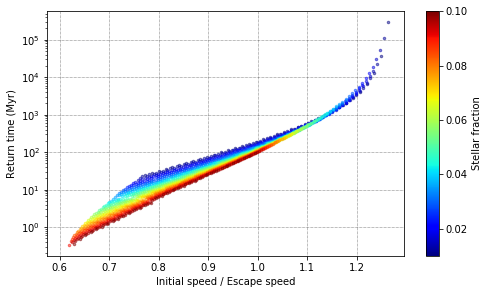

In [8]:
fig, ax = plotSpeedvsRT(grid_s, alpha = 0.5, ms = 2.5, figsize = (8, 4.5))

sm = plt.cm.ScalarMappable(cmap = 'jet', norm = plt.Normalize(vmin = FRACTIONS.min(), vmax = FRACTIONS.max()))
sm._A = []

cb = plt.colorbar(sm)
cb.set_label('Stellar fraction')

fig.savefig('returntimes_speed.png', dpi = 300)
plt.show()

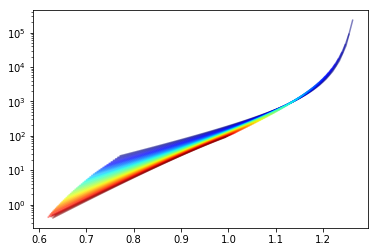

In [9]:
def function(x, a, b, c):
    return a * x + b + c / (x - 1.3)

popts = []
colors = smbh.getColors(len(FRACTIONS))

for i in range(0, 50, 1):
    cut = 0
    y = grid_s[i, cut:, 0]
    v = SPEEDS[cut : ] / ESCAPE_SPEEDS[i]
    y, v = getValidOnly(y, v)
    
    yy = np.log10(y)
    popt, pcov = curve_fit(function, v, yy, maxfev = 1000)

    popts.append(popt)

    ys = function(v, *popt)

#     plt.plot(v, 10 ** yy, 'o', color = colors[i], ms = 0.5)
    plt.plot(v, 10 ** ys, color = colors[i], alpha = 0.5)
plt.yscale('log')

popts = np.array(popts)

[232.01134225  25.01110595   2.83009766]
[17.82196671  2.00537653  0.04876283]


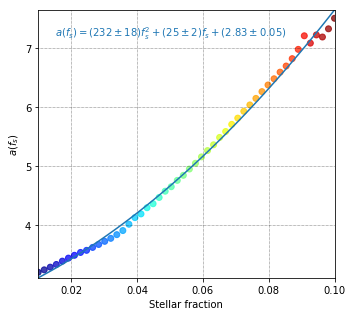

In [73]:
popt, pcov = np.polyfit(FRACTIONS, popts[:, 0], 2, cov = True)
uncer = np.array([pcov[i, i] ** 0.5 for i in range(len(pcov))])

poly_a = np.poly1d(popt)
print(popt)
print(uncer)
y = poly_a(FRACTIONS)

fig, ax = plt.subplots(figsize = (5, 4.5))
ax.scatter(FRACTIONS, popts[:, 0], c = colors, alpha = 0.75)
c = ax.plot(FRACTIONS, y)[0].get_color()

ax.grid()

ax.set_xlim(FRACTIONS.min(), FRACTIONS.max())
ax.set_ylim(y.min(), y.max())

ax.text(0.015, 7.2, '$a(f_s) = (232 \pm 18) f_s^2 + (25 \pm 2)f_s + (2.83 \pm 0.05)$', color = c)

ax.set_xlabel('Stellar fraction')
ax.set_ylabel('$a(f_s)$')

fig.tight_layout()

fig.savefig('a.png', dpi = 300)

plt.show()

[-40.69369381  -0.74708799]
[0.2253527  0.01375861]


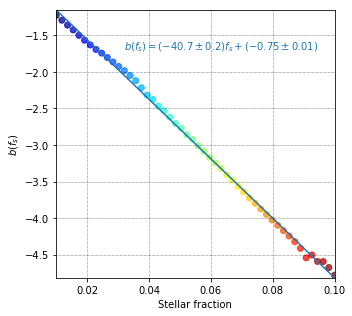

In [74]:
popt, pcov = np.polyfit(FRACTIONS, popts[:, 1], 1, cov = True)
uncer = np.array([pcov[i, i] ** 0.5 for i in range(len(pcov))])

poly_b = np.poly1d(popt)
print(popt)
print(uncer)

y = poly_b(FRACTIONS)

fig, ax = plt.subplots(figsize = (5, 4.5))
ax.scatter(FRACTIONS, popts[:, 1], c = colors, alpha = 0.75)
ax.plot(FRACTIONS, y)

ax.grid()

ax.set_xlim(FRACTIONS.min(), FRACTIONS.max())
ax.set_ylim(y.min(), y.max())

ax.text(0.032, -1.7, '$b(f_s) = (-40.7 \pm 0.2) f_s + (-0.75 \pm 0.01)$', color = c)

ax.set_xlabel('Stellar fraction')
ax.set_ylabel('$b(f_s)$')

fig.tight_layout()

fig.savefig('b.png', dpi = 300)

plt.show()

[60.09787625 -2.79113999 -0.0800642 ]
[2.31681129 0.26069396 0.00633905]


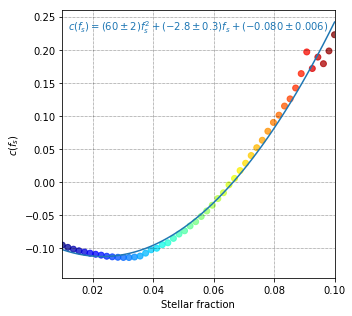

In [89]:
popt, pcov = np.polyfit(FRACTIONS, popts[:, 2], 2, cov = True)

uncer = np.array([pcov[i, i] ** 0.5 for i in range(len(pcov))])

poly_c = np.poly1d(popt)
print(popt)
print(uncer)

y = poly_c(FRACTIONS)

fig, ax = plt.subplots(figsize = (5, 4.5))
ax.scatter(FRACTIONS, popts[:, 2], c = colors, alpha = 0.75)
ax.plot(FRACTIONS, y)

ax.grid()

ax.set_xlim(FRACTIONS.min(), FRACTIONS.max())
# ax.set_ylim(y.min(), y.max())

ax.text(0.012, 0.23, '$c(f_s) = (60 \pm 2) f_s^2 + (-2.8 \pm 0.3) f_s + (-0.080 \pm 0.006)$', color = c)

ax.set_xlabel('Stellar fraction')
ax.set_ylabel('$c(f_s)$')

fig.tight_layout()

fig.savefig('c.png', dpi = 300)

plt.show()

In [88]:
# from mpl_toolkits.mplot3d import Axes3D

# %matplotlib

Using matplotlib backend: TkAgg


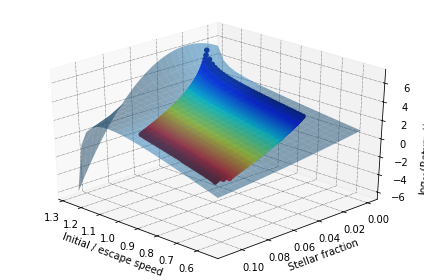

In [88]:
speeds = np.linspace(0.55, 1.27, 25)
fractions = np.linspace(0.0, 0.11, 25)

V, F = np.meshgrid(speeds, fractions)

Z = function(V, poly_a(F), poly_b(F), poly_c(F))

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
ax.plot_surface(V, F, Z, alpha = 0.5)

colors = smbh.getColors(len(FRACTIONS))
for (i, fs) in enumerate(FRACTIONS):
    data = grid_s[i, :, 0]
    data, v = getValidOnly(data, SPEEDS[:] / ESCAPE_SPEEDS[i])
    fs = np.ones_like(data) * fs
    
    ax.scatter(v, fs, np.log10(data), color = colors[i], alpha = 1)
    
ax.view_init(30, 45 * 3)

ax.set_xlabel('Initial / escape speed')
ax.set_ylabel('Stellar fraction')
ax.set_zlabel('log$_{10}$(Return time (Gry)')

fig.tight_layout()

fig.savefig('surface.png', dpi = 300)

plt.show()